# ODE solution techniques
## solutions for exponential growth includes: 
   - Analytic
   - Euler forward
   - RK-2
   - RK-4
   - scipy.integrate.odeint
   - scipy.integrate.ivp_solve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## define parameters

In [2]:
tau = 2. # doubling time
a = np.log(2)/tau # exponential growth rate
h = 2 # time step
t = np.arange(0,10+h,h) # time = 10-day range
xo = 1

# analytic solution

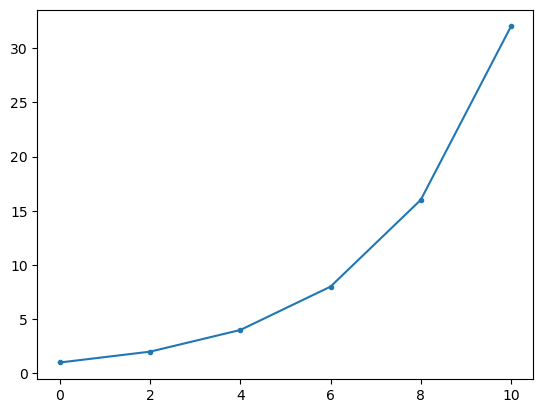

In [3]:
x = xo*np.exp(a*t)
plt.plot(t,x,'.-',label='analytic solution')

# Numerical solution - Euler forward

In [4]:
# set up a helper function
def tendency(time,xin):
    tau=2.
    a = np.log(2.)/tau
    dxdt = a*xin
    return dxdt
def timestep(x,dxdt,step):
    xnew = x + dxdt*step
    return xnew

In [5]:
N = np.size(t)
x_ef=np.empty(N)
x_ef[0]=xo # initialize
for n in range(N-1):
    dxdt=tendency(t[n],x_ef[n])
    x_ef[n+1]=timestep(x_ef[n],dxdt,h)

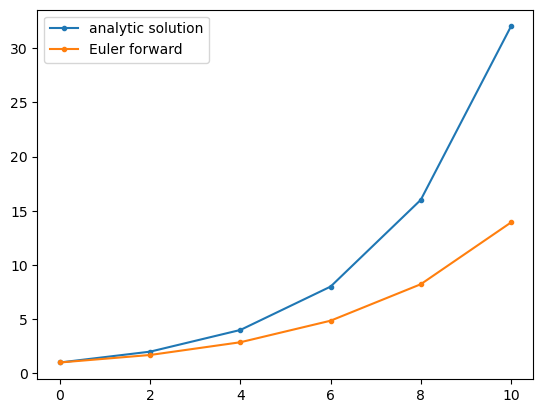

In [6]:
# compare results
x = xo*np.exp(a*t)
plt.plot(t,x,'.-',label='analytic solution')
plt.plot(t,x_ef,'.-',label='Euler forward')
plt.legend()
plt.show()

## Numerical solution - RK2

In [7]:
x_rk2=np.empty(N)
x_rk2[0]=xo # initialize
for n in range(N-1):
    dxdt1=tendency(t[n],x_rk2[n])
    x1=timestep(x_rk2[n],dxdt1,h)
    dxdt2=tendency(t[n],x1)
    x_rk2[n+1]=x_rk2[n]+h/2*(dxdt1+dxdt2)

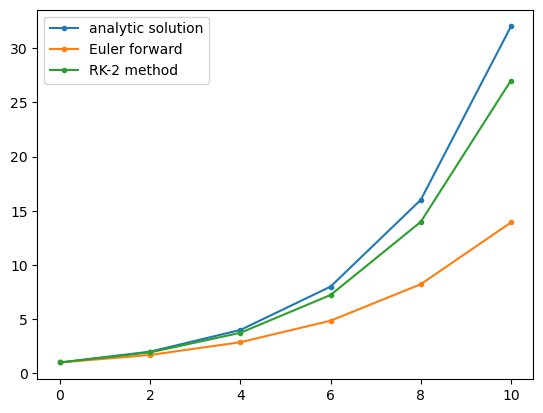

In [8]:
# compare results
x = xo*np.exp(a*t)
plt.plot(t,x,'.-',label='analytic solution')
plt.plot(t,x_ef,'.-',label='Euler forward')
plt.plot(t,x_rk2,'.-',label='RK-2 method')
plt.legend()
plt.show()

## Numerical solution - RK4

In [9]:
x_rk4=np.empty(N)
x_rk4[0]=xo # initialize
for n in range(N-1):
    dxdt1=tendency(t[n],x_rk4[n])
    x1=timestep(x_rk4[n],dxdt1,h/2) # half step 1st try
    dxdt2=tendency(t[n]+h/2,x1)
    x2=timestep(x_rk4[n],dxdt2,h/2) # half step 2nd try
    dxdt3=tendency(t[n]+h/2,x2)
    x3=timestep(x_rk4[n],dxdt3,h) # full step 3rd try
    dxdt4=tendency(t[n]+h,x3)
    x_rk4[n+1]=x_rk4[n]+h/6*(dxdt1+2*dxdt2+2*dxdt3+dxdt4)

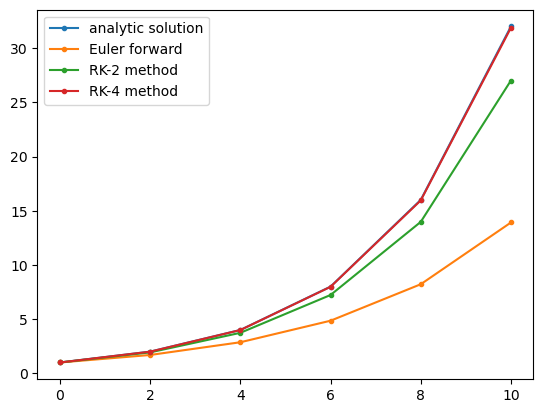

In [10]:
# compare results
x = xo*np.exp(a*t)
plt.plot(t,x,'.-',label='analytic solution')
plt.plot(t,x_ef,'.-',label='Euler forward')
plt.plot(t,x_rk2,'.-',label='RK-2 method')
plt.plot(t,x_rk4,'.-',label='RK-4 method')
plt.legend()
plt.show()

## Use a library: scipy.integrate.odeint

In [11]:
sol=odeint(tendency,[1],t,tfirst=True)
x_ode = sol

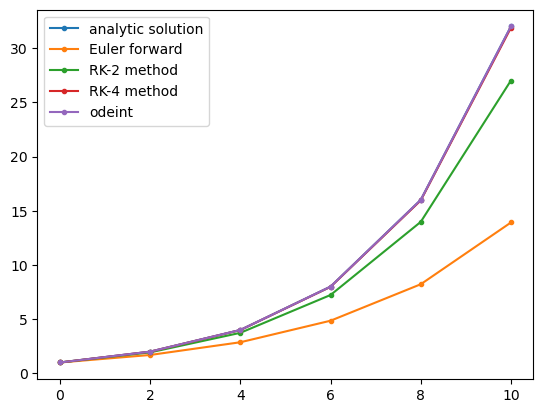

In [12]:
# compare results
x = xo*np.exp(a*t)
plt.plot(t,x,'.-',label='analytic solution')
plt.plot(t,x_ef,'.-',label='Euler forward')
plt.plot(t,x_rk2,'.-',label='RK-2 method')
plt.plot(t,x_rk4,'.-',label='RK-4 method')
plt.plot(t,x_ode,'.-',label='odeint')
plt.legend()
plt.show()

## Use a library : solve_ivp

In [13]:
sol=solve_ivp(tendency,[0,10],[1],max_step=h,method='RK45')
t_ivp=sol.t
x_ivp=sol.y.flatten()

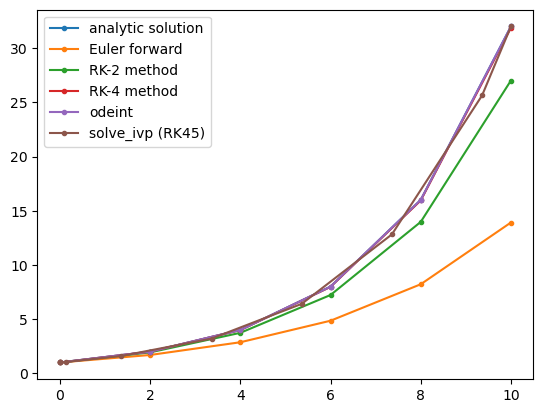

In [14]:
# compare results
plt.plot(t,x,'.-',label='analytic solution')
plt.plot(t,x_ef,'.-',label='Euler forward')
plt.plot(t,x_rk2,'.-',label='RK-2 method')
plt.plot(t,x_rk4,'.-',label='RK-4 method')
plt.plot(t,x_ode,'.-',label='odeint')
plt.plot(t_ivp,x_ivp,'.-',label='solve_ivp (RK45)')
plt.legend()
plt.show()